In [11]:
!pip install pydotplus

**Import the required libraries**

In [18]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# resample the dataset
#from sklearn.utils import resample
#from sklearn.utils import shuffle

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

import random
from jupyterthemes import jtplot
jtplot.style()

In [19]:
# type your code here
df_employee = pd.read_csv('~/Desktop/New folder (3)/slc/inclass/Day 2/emp_attrition.csv')
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [20]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1580 non-null   int64 
 1   Attrition                1580 non-null   object
 2   BusinessTravel           1580 non-null   object
 3   Department               1580 non-null   object
 4   DistanceFromHome         1580 non-null   int64 
 5   EducationField           1580 non-null   object
 6   EnvironmentSatisfaction  1580 non-null   int64 
 7   Gender                   1580 non-null   object
 8   JobInvolvement           1580 non-null   int64 
 9   JobLevel                 1580 non-null   int64 
 10  JobRole                  1580 non-null   object
 11  JobSatisfaction          1580 non-null   int64 
 12  MonthlyIncome            1580 non-null   int64 
 13  NumCompaniesWorked       1580 non-null   int64 
 14  OverTime                 1580 non-null  

<AxesSubplot:>

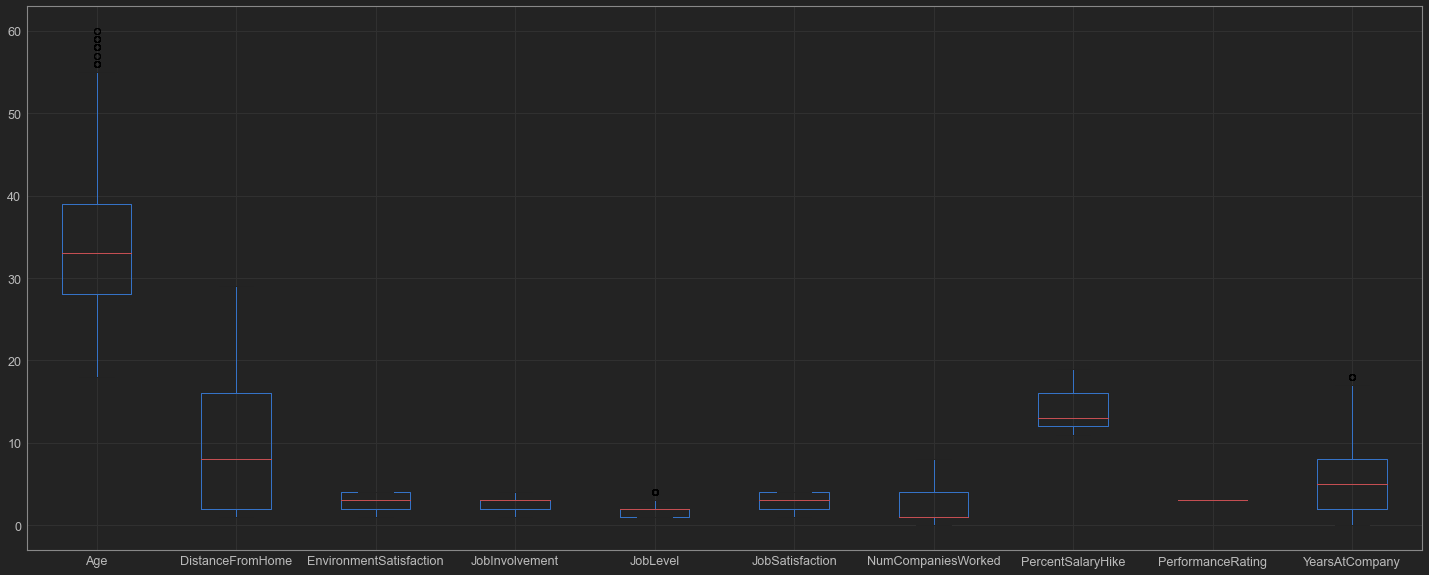

In [21]:
# type your code here
plt.figure(figsize=(25,10))
df_employee.drop('MonthlyIncome',axis =1).boxplot()

In [22]:
Q1 = df_employee.quantile(0.25)
Q3 = df_employee.quantile(0.75)
IQR = q3-q1
df_employee = df_employee[~((df_employee < (Q1 - 1.5 * IQR)) | (df_employee > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the row index
df_employee = df_employee.reset_index(drop=True)

# check the shape of the data
df_employee.shape


NameError: name 'q3' is not defined

In [23]:
# type your code here
# store the target variable "Attrition" in a dataframe 'df_target'
df_target = df_employee['Attrition']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column "Attrition" using drop()
# 'axis = 1' drops the specified column
df_feature = df_employee.drop('Attrition', axis = 1)

In [24]:
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0
        
# change the datatype of the target variable to integer
df_target = df_target.astype('int')

In [25]:
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

In [26]:
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'OverTime'],
      dtype='object')

In [27]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [28]:
X = pd.concat([df_num, dummy_var], axis = 1)

# display first five observations
X.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33,3,1,3,1,1,3348,1,11,3,10,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,32,4,4,1,3,4,10400,1,11,3,14,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,40,9,4,3,1,1,2018,3,14,3,5,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,42,7,2,4,2,2,2372,6,16,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,43,27,3,3,3,1,10820,8,11,3,8,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [29]:
X_subset = X.iloc[:,[2,6]]

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X_subset, df_target, random_state = 10, test_size = 0.3)

# instantiate the 'DecisionTreeClassifier' object using 'gini' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeClassifier(random_state=10)

# fit the model using fit() on train data
decision_tree = decision_tree.fit(X_train, y_train)

# predict the attrition for test set
y_pred = decision_tree.predict(X_test)

# pass the actual and predicted target values to the accuracy_score()
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8966244725738397


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

# instantiate the 'DecisionTreeClassifier' object using 'gini' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_full = DecisionTreeClassifier(random_state=10,max_depth=5,min_samples_leaf=20)

# fit the model using fit() on train data
decision_tree_full = decision_tree_full.fit(X_train, y_train)

# predict the attrition for test set
y_pred_full = decision_tree_full.predict(X_test)

# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': decision_tree_full.feature_importances_})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
6,MonthlyIncome,0.231669
29,OverTime_Yes,0.164501
0,Age,0.143270
10,YearsAtCompany,0.115178
2,EnvironmentSatisfaction,0.088331
19,EducationField_Technical Degree,0.050032
5,JobSatisfaction,0.045909
7,NumCompaniesWorked,0.037811
14,Department_Sales,0.036039
1,DistanceFromHome,0.028887


In [31]:
y_pred_full[0:5]

array([0, 1, 0, 1, 0])

In [32]:
# type your code here

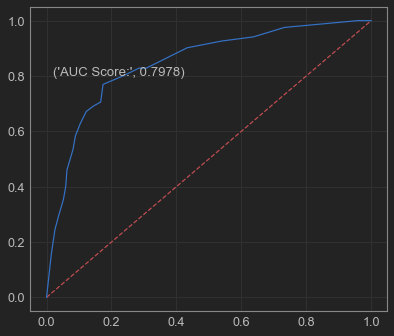

In [33]:
# type your code here
y_pred_proba = decision_tree_full.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_full),4)))
                               
# plot the grid
plt.grid(True)

In [34]:
y_pred_proba[:,1]

array([0.02040816, 0.9       , 0.        , 0.83333333, 0.16949153,
       0.02040816, 0.19298246, 0.76666667, 0.69230769, 1.        ,
       0.19417476, 0.02040816, 0.80487805, 0.67857143, 0.61111111,
       0.76666667, 0.70833333, 0.02040816, 0.19417476, 0.41666667,
       0.19417476, 0.43589744, 0.61111111, 0.69230769, 0.27586207,
       0.41666667, 0.67857143, 1.        , 0.19417476, 0.02040816,
       0.02040816, 0.        , 0.90909091, 0.19417476, 0.43589744,
       1.        , 0.76666667, 0.69230769, 0.19417476, 0.75      ,
       0.02040816, 0.41666667, 0.27586207, 0.16949153, 0.70833333,
       0.19417476, 0.66666667, 0.66666667, 0.69230769, 0.9       ,
       0.9       , 0.43589744, 0.90909091, 0.66666667, 0.80487805,
       0.02040816, 0.19417476, 0.7037037 , 0.70833333, 0.02040816,
       0.02040816, 0.02040816, 0.76666667, 0.79310345, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.69565217, 0.27586207,
       0.69565217, 0.27586207, 0.75      , 0.33333333, 0.43589

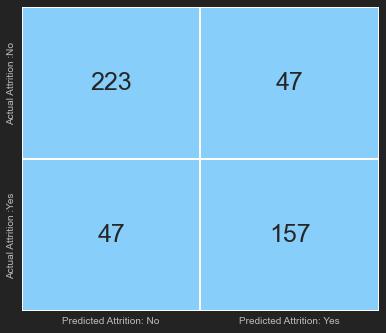

In [38]:
# type your code here
cm = confusion_matrix(y_test, y_pred_full)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

In [39]:
# type your code here
# True Negative from confusion matrix
TN = cm[0][0]
# True Positive from confusion matrix
TP = cm[1][1]
# False Positive from confusion matrix
FP = cm[0][1]
# False Negative from confusion matrix
FN = cm[1][0]

# add all the values of a confusion matrix
total = TN + TP + FP + FN

# find the percentage of correctly classified observations
# round the result upto 2 decimal points
correct_classified_percentage = ((TN+TP)/total)*100
print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2))

# find the percentage of  misclassified observations
# round the result upto 2 decimal points
misclassified_percentage = ((FP+FN)/total)*100
print("Percentage of misclassified observations: ", round(misclassified_percentage, 2))

# find the specificity
# round the result upto 4 decimal points
specificity = TN/(TN+FP)
print("\nSpecificity: ", round(specificity, 4))

# find the sensitivity
# round the result upto 4 decimal points
sensitivity = TP/(TP+FN)
print("Sensitivity: ", round(sensitivity, 4))

Percentage of correctly classified observations:  80.17
Percentage of misclassified observations:  19.83

Specificity:  0.8259
Sensitivity:  0.7696


In [43]:
X_train

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
447,47,4,4,3,2,4,4163,1,17,3,9,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1079,34,2,4,2,2,1,5957,6,13,3,11,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
60,45,26,1,3,2,1,4286,2,14,3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
952,34,6,2,3,1,1,2960,2,11,3,4,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
567,33,1,3,4,2,1,5376,2,19,3,5,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1316,29,9,2,1,1,2,2760,1,13,3,2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1357,18,1,4,3,1,4,1611,1,15,3,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
326,31,1,4,2,1,1,2218,1,12,3,4,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
539,36,1,3,3,2,2,5228,0,15,3,9,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
104,27,22,1,2,1,2,2863,1,12,3,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


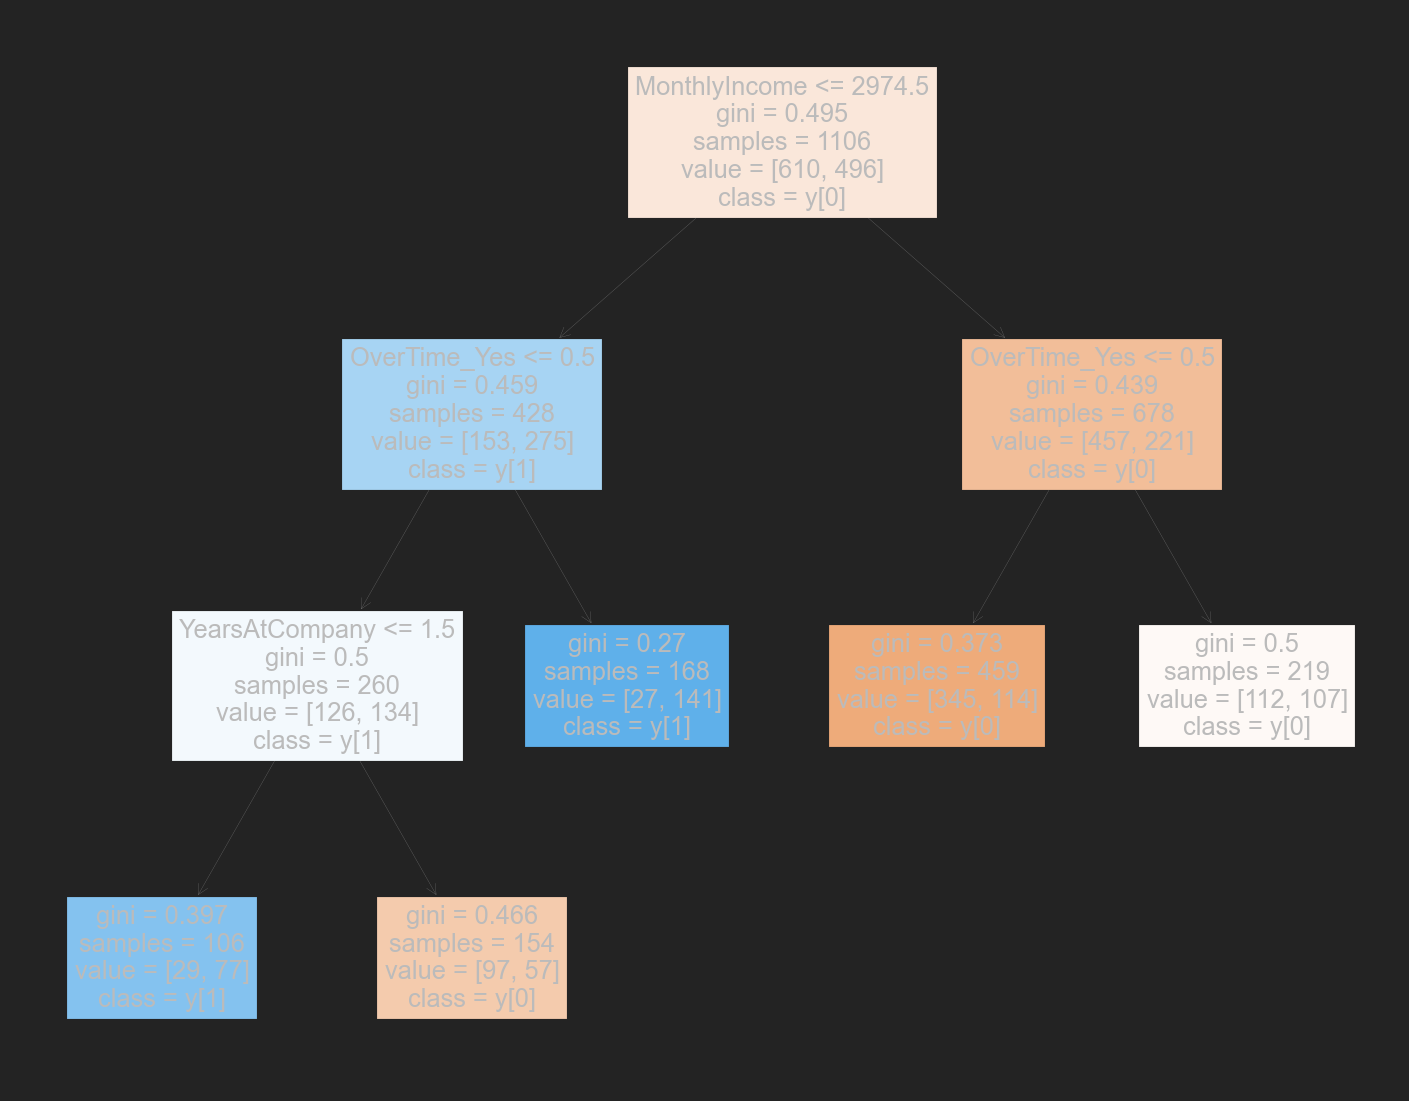

In [41]:
# type your code here
decision_tree_classification = DecisionTreeClassifier(max_leaf_nodes = 5)

# fit the model using fit() on train data
dt_model = decision_tree_classification.fit(X_train, y_train)

# plot a decision tree
# save the column names in 'labels'
labels = X_train.columns

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["No","Yes"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
# Image(graph.create_png())
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_classification , 
                   feature_names=X_train.columns,  
                   class_names=True,
                   filled=True)

In [ ]:
# type your code here
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

In [17]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
scores

In [ ]:
decision_tree_model = DecisionTreeClassifier()

# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing Decision Tree Classification
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'accuracy' for accuracy
scores = cross_val_score(estimator = decision_tree_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'accuracy')

# get the average of the accuracy obtained after 10 fold cross validation
# round the result upto 2 decimal points
print("Mean accuracy after 10 fold cross validation: ", round(scores.mean(), 2))

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [ ]:

# type your code here
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_model = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Decision Tree Classifier: ', tree_grid.best_params_, '\n')